In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
# X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
# X = pd.DataFrame(X)
df = pd.read_csv('Resources/Electricitynew2.csv')
        


In [47]:
df.head()

,Coal,Natural_gas,Petroleum,Nuclear_renewables_and_other,CO2_Emissions
0,5.083383,4.891813,16.421085,0.919662,1A
1,5.043747,5.078343,16.415104,0.979799,1A
2,4.969609,5.133591,16.589333,0.999856,1A
3,5.375832,5.582383,17.611993,0.991090,1A
4,5.450242,5.803936,19.143624,1.051593,1A


In [48]:
X = df.drop('CO2_Emissions', axis=1)
y = df['CO2_Emissions'] 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#had , random_state=1  don't know if I want to keep that
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
clf = RandomForestClassifier(n_estimators=10).fit(X_train_scaled, y_train)
#random_state=1
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.98989898989899
Testing Score: 0.9411764705882353


In [51]:
feature_importances = clf.feature_importances_

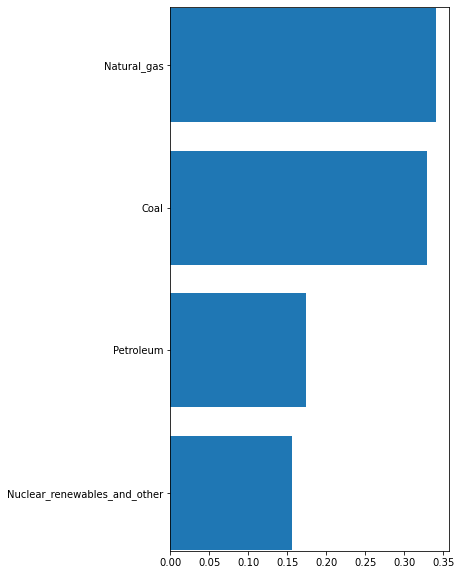

In [52]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

Now for test data set with values increased by 20%

In [53]:
# found on https://builtin.com/data-science/pandas-add-column

testdf = df.assign(Natural_gas = df.Natural_gas * 1.2)
testdf.head()

,Coal,Natural_gas,Petroleum,Nuclear_renewables_and_other,CO2_Emissions
0,5.083383,5.870175,16.421085,0.919662,1A
1,5.043747,6.094011,16.415104,0.979799,1A
2,4.969609,6.160309,16.589333,0.999856,1A
3,5.375832,6.698860,17.611993,0.991090,1A
4,5.450242,6.964723,19.143624,1.051593,1A


In [54]:
X1 = testdf.drop('CO2_Emissions', axis=1)
y1 = testdf['CO2_Emissions'] 

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

scaler = StandardScaler().fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [56]:
clf = RandomForestClassifier(n_estimators=500).fit(X1_train_scaled, y1_train)
#random_state=1
print(f'Training Score: {clf.score(X1_train_scaled, y1_train)}')
print(f'Testing Score: {clf.score(X1_test_scaled, y1_test)}')

Training Score: 1.0
Testing Score: 0.8529411764705882


In [57]:
feature_importances = clf.feature_importances_

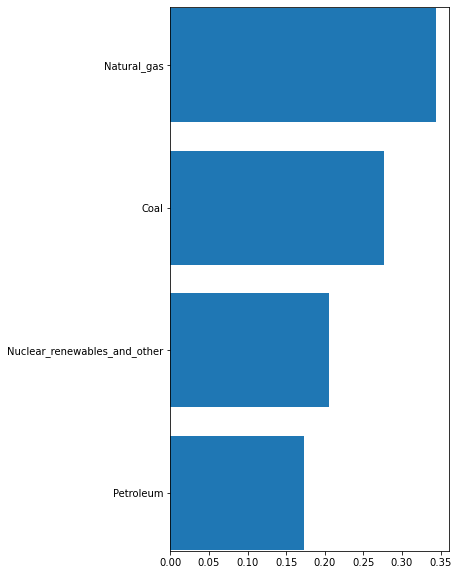

In [58]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()